In [ ]:
import pandas as pd
import torch 
from torch import nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy

In [ ]:
dados = [['open', 'high', 'low', 'close', 'volume'], 
         ['1572.69000000', '1612.92000000', '1563.69000000', '1578.48000000', '527539.29650000'], 
         ['1578.47000000', '1621.68000000', '1502.32000000', '1518.34000000', '981395.36480000'], 
         ['1518.33000000', '1559.01000000', '1515.17000000', '1531.01000000', '560202.88130000'], 
         ['1531.01000000', '1680.00000000', '1528.40000000', '1644.78000000', '935531.47810000'], 
         ['1644.78000000', '1666.97000000', '1621.42000000', '1626.98000000', '351385.53620000'], 
         ['1626.98000000', '1639.02000000', '1564.39000000', '1568.29000000', '414863.95250000'], 
         ['1568.25000000', '1608.04000000', '1545.03000000', '1568.10000000', '642409.44940000'], 
         ['1568.09000000', '1579.98000000', '1233.00000000', '1334.77000000', '2339916.50890000'], 
         ['1334.78000000', '1337.16000000', '1073.53000000', '1102.73000000', '2494797.93570000'], 
         ['1102.73000000', '1350.00000000', '1085.93000000', '1299.28000000', '1975955.67670000'], 
         ['1299.28000000', '1310.00000000', '1201.26000000', '1289.28000000', '1308087.14980000'], 
         ['1289.35000000', '1292.16000000', '1238.70000000', '1257.25000000', '547772.91720000'], 
         ['1257.25000000', '1274.23000000', '1200.66000000', '1221.49000000', '547410.53040000'], 
         ['1221.50000000', '1291.20000000', '1171.13000000', '1243.28000000', '934742.00590000'], 
         ['1243.29000000', '1291.00000000', '1234.01000000', '1253.23000000', '632825.56800000'], 
         ['1253.22000000', '1268.67000000', '1187.06000000', '1216.17000000', '673339.72150000'], 
         ['1216.16000000', '1228.22000000', '1181.05000000', '1200.43000000', '530537.34880000'], 
         ['1200.42000000', '1234.00000000', '1199.18000000', '1212.58000000', '360218.53370000'], 
         ['1212.58000000', '1235.00000000', '1197.67000000', '1217.67000000', '209789.58880000'],
         ['1217.67000000', '1227.07000000', '1132.65000000', '1142.21000000', '531108.76070000'], 
         ['1142.21000000', '1146.99000000', '1079.76000000', '1107.34000000', '922647.94540000'], 
         ['1107.34000000', '1146.13000000', '1075.00000000', '1139.60000000', '748884.57910000'], 
         ['1139.59000000', '1190.00000000', '1127.75000000', '1184.52000000', '636927.15940000'], 
         ['1184.52000000', '1217.71000000', '1180.60000000', '1203.73000000', '486080.61230000'], 
         ['1203.72000000', '1207.77000000', '1171.20000000', '1199.30000000', '391430.16580000'], 
         ['1199.29000000', '1235.66000000', '1196.20000000', '1205.60000000', '379840.81160000'], 
         ['1205.61000000', '1223.33000000', '1188.65000000', '1193.88000000', '286386.79860000'], 
         ['1193.88000000', '1199.25000000', '1151.02000000', '1167.77000000', '478795.60930000'], 
         ['1167.77000000', '1228.37000000', '1158.27000000', '1216.49000000', '512143.58610000'], 
         ['1216.49000000', '1309.77000000', '1212.50000000', '1294.46000000', '815679.27170000'], 
         ['1294.46000000', '1299.90000000', '1262.77000000', '1276.41000000', '430018.73910000'], 
         ['1276.40000000', '1297.18000000', '1265.24000000', '1295.59000000', '371559.58500000'], 
         ['1295.58000000', '1309.00000000', '1236.26000000', '1240.51000000', '347148.25880000'], 
         ['1240.50000000', '1287.19000000', '1240.10000000', '1279.41000000', '324129.54660000'], 
         ['1279.40000000', '1305.11000000', '1246.61000000', '1259.41000000', '391628.51660000'], 
         ['1259.41000000', '1274.76000000', '1241.56000000', '1271.32000000', '301631.83900000'], 
         ['1271.31000000', '1278.69000000', '1218.01000000', '1231.18000000', '398559.51660000'], 
         ['1231.18000000', '1292.58000000', '1222.01000000', '1280.18000000', '406653.54470000'], 
         ['1280.18000000', '1296.64000000', '1250.00000000', '1263.10000000', '406008.00320000'], 
         ['1263.11000000', '1283.61000000', '1259.60000000', '1266.35000000', '182278.63960000'], 
         ['1266.35000000', '1284.75000000', '1255.85000000', '1263.01000000', '180494.90200000'], 
         ['1263.00000000', '1278.90000000', '1240.03000000', '1275.40000000', '363750.54810000'], 
         ['1275.41000000', '1349.00000000', '1255.10000000', '1320.69000000', '659393.88250000'], 
         ['1320.69000000', '1352.72000000', '1301.00000000', '1307.44000000', '554465.57170000'], 
         ['1307.45000000', '1311.14000000', '1259.27000000', '1266.54000000', '390051.24470000'], 
         ['1266.53000000', '1280.06000000', '1155.32000000', '1166.83000000', '751422.27790000'], 
         ['1166.82000000', '1190.03000000', '1161.92000000', '1187.16000000', '328881.62810000'], 
         ['1187.16000000', '1199.54000000', '1170.32000000', '1183.06000000', '252260.14400000'], 
         ['1183.06000000', '1195.00000000', '1150.51000000', '1167.82000000', '296832.72280000'], 
         ['1167.82000000', '1230.47000000', '1163.12000000', '1216.94000000', '465184.19430000'], 
         ['1216.95000000', '1223.39000000', '1203.02000000', '1213.78000000', '245723.83770000'], 
         ['1213.78000000', '1237.99000000', '1182.54000000', '1217.71000000', '336761.65980000'], 
         ['1217.72000000', '1231.99000000', '1210.00000000', '1219.99000000', '278604.28820000'], 
         ['1219.98000000', '1227.99000000', '1214.69000000', '1220.41000000', '123701.53010000'], 
         ['1220.42000000', '1225.00000000', '1193.18000000', '1218.51000000', '231652.06120000'], 
         ['1218.52000000', '1231.09000000', '1211.67000000', '1228.11000000', '162723.08570000'], 
         ['1228.12000000', '1233.73000000', '1200.58000000', '1211.55000000', '262437.63980000'], 
         ['1211.55000000', '1215.78000000', '1181.06000000', '1190.15000000', '367828.89140000'], 
         ['1190.15000000', '1206.57000000', '1186.77000000', '1200.49000000', '249130.48690000'], 
         ['1200.48000000', '1202.15000000', '1181.08000000', '1199.99000000', '266014.21150000'], 
         ['1199.98000000', '1208.46000000', '1191.66000000', '1196.13000000', '139379.28110000'], 
         ['1196.13000000', '1204.67000000', '1190.57000000', '1200.34000000', '117762.06850000'], 
         ['1200.33000000', '1224.29000000', '1193.00000000', '1214.00000000', '252794.14000000'], 
         ['1213.99000000', '1219.89000000', '1204.93000000', '1214.55000000', '205519.49440000'], 
         ['1214.56000000', '1272.60000000', '1212.71000000', '1256.90000000', '457799.66480000'], 
         ['1256.91000000', '1259.95000000', '1242.81000000', '1251.24000000', '272805.33000000'], 
         ['1251.25000000', '1276.70000000', '1236.00000000', '1269.14000000', '342344.20230000'], 
         ['1269.13000000', '1271.09000000', '1261.30000000', '1264.07000000', '129474.28840000'],
         ['1264.06000000', '1296.00000000', '1257.77000000', '1290.16000000', '213636.78480000'], 
         ['1290.15000000', '1344.91000000', '1285.44000000', '1320.39000000', '581727.69680000'], 
         ['1320.40000000', '1347.69000000', '1316.80000000', '1335.62000000', '459660.23070000'], 
         ['1335.63000000', '1398.00000000', '1321.04000000', '1389.39000000', '472465.95560000'],
         ['1389.40000000', '1438.00000000', '1361.92000000', '1415.92000000', '877712.44920000'], 
         ['1415.91000000', '1464.00000000', '1401.03000000', '1451.20000000', '499377.86490000'], 
         ['1451.21000000', '1599.98000000', '1449.14000000', '1549.90000000', '940691.77740000'], 
         ['1549.91000000', '1566.66000000', '1516.03000000', '1552.52000000', '387832.71380000'], 
         ['1552.52000000', '1604.50000000', '1521.31000000', '1576.94000000', '574622.89530000'], 
         ['1576.94000000', '1609.00000000', '1541.15000000', '1565.57000000', '506771.72190000'],
         ['1565.56000000', '1610.00000000', '1501.39000000', '1511.43000000', '752534.88570000'], 
         ['1511.44000000', '1564.43000000', '1509.15000000', '1551.09000000', '308679.46450000'], 
         ['1551.09000000', '1669.90000000', '1542.02000000', '1659.29000000', '440513.62450000']]

In [ ]:
np.savetxt("CryptoData.csv",
            dados,
            delimiter= ',',
            fmt ='% s')

In [ ]:
df = pd.read_csv("/content/CryptoData.csv")
df.head()

,open,high,low,close,volume
0,1572.69,1612.92,1563.69,1578.48,527539.2965
1,1578.47,1621.68,1502.32,1518.34,981395.3648
2,1518.33,1559.01,1515.17,1531.01,560202.8813
3,1531.01,1680.00,1528.40,1644.78,935531.4781
4,1644.78,1666.97,1621.42,1626.98,351385.5362


In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df["DifPrice"] = df.high - df.low
df["VarPrice"] = (df.close-df.open)/df.open
df = df.drop(["low","high", "open"], axis=1)

In [ ]:
df.head()

,close,volume,DifPrice,VarPrice
0,1578.48,527539.2965,49.23,0.003682
1,1518.34,981395.3648,119.36,-0.038094
2,1531.01,560202.8813,43.84,0.008351
3,1644.78,935531.4781,151.60,0.074310
4,1626.98,351385.5362,45.55,-0.010822


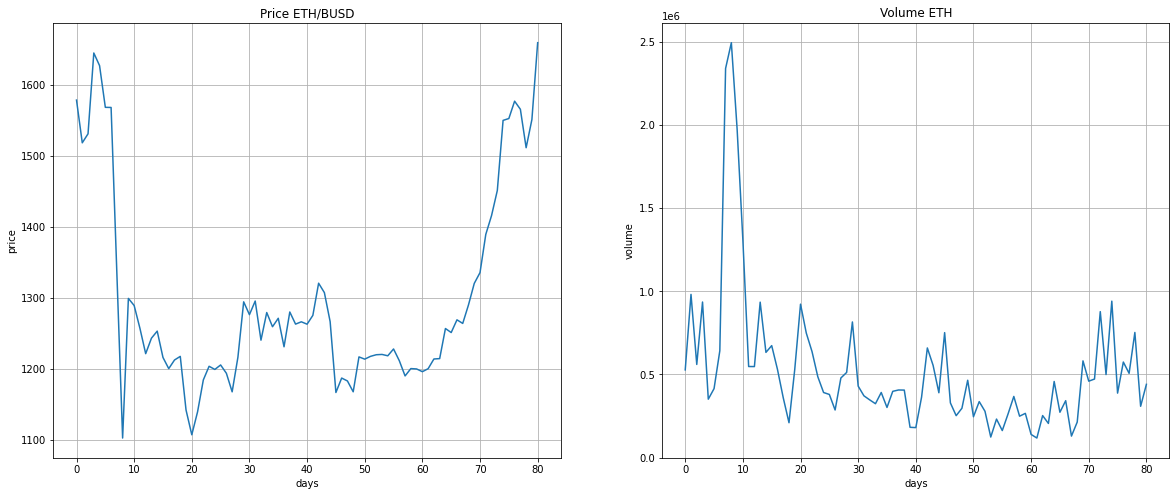

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
ax[0].plot(df.close)
ax[0].set_xlabel("days")
ax[0].set_ylabel("price")
ax[0].grid()
ax[0].set_title("Price ETH/BUSD")

ax[1].plot(df.volume)
ax[1].set_xlabel("days")
ax[1].set_ylabel("volume")
ax[1].grid()
ax[1].set_title("Volume ETH")

plt.show()

In [ ]:
data_lstm = df
scaler = MinMaxScaler()
data_MM = scaler.fit_transform(data_lstm)
data_lstm.shape

(81, 4)

In [ ]:
class MyDataset(Dataset):
  def __init__(self, input, seq_len):
    self.input = input
    self.seq_len = seq_len
  def __getitem__(self, item):
    return self.input[item:item+self.seq_len], self.input[item+self.seq_len][0]
  def __len__(self):
    return len(self.input) - self.seq_len

In [ ]:
# data_np = data_MM.to_numpy()
data_tc = torch.tensor(data_MM, dtype = torch.float)

ds = MyDataset(data_tc,20)
dl = DataLoader(ds, batch_size=1, )

In [ ]:
for x,y in dl:
  print(x.shape, y.shape)
  break

torch.Size([1, 20, 4]) torch.Size([1])


In [ ]:
class ModelLstm(nn.Module):
  def __init__(self, input_size, num_hidden, num_layers) -> None:
    super().__init__()

    self.input_size = input_size
    self.num_hidden = num_hidden
    self.num_layers = num_layers

    self.lstm = nn.LSTM(input_size, 
                        num_hidden, 
                        num_layers,
                        batch_first=True,
                        bidirectional=True)

    self.out = nn.Linear(num_hidden,1)

  def forward(self, x):
    self.lstm.flatten_parameters()

    y, (hidden,_) = self.lstm(x)
    o = self.out(hidden[-1])

    return o

In [ ]:
net = ModelLstm(input_size = 4, 
                num_hidden = 128, 
                num_layers = 2)
lossfun = nn.MSELoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=.01)

In [ ]:
def treinador(modelo, lossfun, optimizer, datas):
  BestModel = {'Loss':100, 'net':None}
  epochs = 200
  losses = np.zeros(epochs)

  for epochi in range(epochs):
    loss_ep = []

    for x, y in datas:
      y_hat = modelo(x)
      y_final = y_hat[-1]
      loss = lossfun(y_final, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    loss_ep.append(loss.item())
    losses[epochi] = np.mean(loss_ep)
    if loss_ep[-1]<BestModel['Loss']:
      BestModel['Loss'] = loss_ep[-1]
      BestModel['net'] = copy.deepcopy(modelo.state_dict())

  return modelo, losses, BestModel

In [ ]:
modelo, losses, BestModel = treinador(net, lossfun, optimizer, dl)

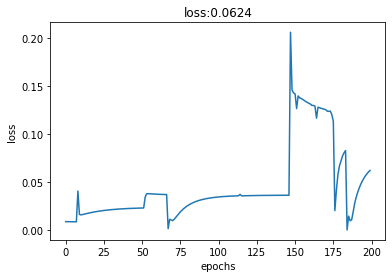

In [ ]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title(f'loss:{losses[-1]:.4f}')
plt.show()

In [ ]:
x_valid = data_tc[-7:-2]
y_valid = data_tc[-1][0]
x_valid, y_valid

(tensor([[0.8035, 0.3462, 0.4183, 0.6869],
         [0.8082, 0.1136, 0.1211, 0.4985],
         [0.8520, 0.1922, 0.2177, 0.5384],
         [0.8316, 0.1637, 0.1722, 0.4733],
         [0.7343, 0.2670, 0.2931, 0.3956]]), tensor(1.))

In [ ]:
x_valid

tensor([[0.8035, 0.3462, 0.4183, 0.6869],
        [0.8082, 0.1136, 0.1211, 0.4985],
        [0.8520, 0.1922, 0.2177, 0.5384],
        [0.8316, 0.1637, 0.1722, 0.4733],
        [0.7343, 0.2670, 0.2931, 0.3956]])

In [ ]:
data_tc[-1]

tensor([1.0000, 0.1358, 0.3502, 0.6919])

In [ ]:
true_v = scaler.inverse_transform(data_tc[-1].reshape((1,-1)))

In [ ]:
y_hat = modelo(x_valid)[-1]
y_hat

tensor(0.8211, grad_fn=<SelectBackward0>)

In [ ]:
result = scaler.inverse_transform(np.array([y_hat.item(),1,1,1]).reshape((1,-1)))

In [ ]:
result[0][0]

1559.703533539772

In [ ]:
true_v[0][0]

1659.29

In [ ]:
BestModel['Loss']

0.00027928530471399426

In [ ]:
# torch.save(modelo.state_dict(), 'trainedModel.pt')

In [ ]:
bestModel = ModelLstm(input_size = 4, 
                num_hidden = 128, 
                num_layers = 2)
bestModel.load_state_dict(BestModel['net'])

<All keys matched successfully>

In [ ]:
y_hatB = bestModel(x_valid)[-1]
result = scaler.inverse_transform(np.array([y_hatB.item(),1,1,1]).reshape((1,-1)))
result[0][0]

1654.8842193508146

In [ ]:
torch.save(bestModel.state_dict(), 'trainedModel.pt')